In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
with open('/Users/wesleymaddox/Desktop/ninetales/Desktop/nfs01_tesla/swa_uncertainties/segment_0111_sgd_1e-2_w_d/log.out') as f:
    lines = f.readlines()
lines = [l.rstrip('\n') for l in lines]

In [3]:
train_loss = []
train_acc = []
val_loss = []
val_acc = []
val_iou = []
for l in lines:
    if 'Train - ' in l:
        split_train = l.split(' ')
        train_loss.append( float(split_train[3].split(',')[0]) )

        train_acc.append( float(split_train[5]) )
    if 'Val - ' in l:
        split_val = l.split(' ')
        val_loss.append( float(split_val[3]) )
        val_acc.append( float(split_val[6]) )
        val_iou.append( float(split_val[9]) )


ValueError: x and y must have same first dimension, but have shapes (170,) and (31,)

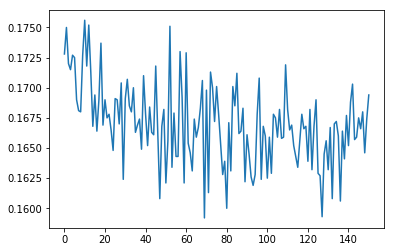

In [4]:
plt.plot(train_loss, label='Train')
plt.plot(range(5,855,5), val_loss, label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim((0.1, 0.35))

In [ ]:
plt.plot(train_acc, label='Train')
plt.plot(range(5,855,5), val_acc, label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0,0.5,'Val mIOU')

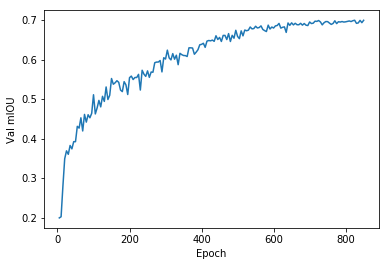

In [10]:
plt.plot(range(5, 855, 5), val_iou)
plt.xlabel('Epoch')
plt.ylabel('Val mIOU')

In [2]:
with open('/Users/wesleymaddox/Desktop/ninetales/Desktop/nfs01_tesla/swa_uncertainties/segment_0114_sgd_1e-2_resume//log.out') as f:
    lines = f.readlines()
lines = [l.rstrip('\n') for l in lines]

(0.1, 0.35)

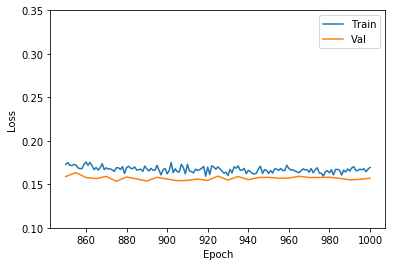

In [8]:
plt.plot(range(850, 1001), train_loss, label='Train')
plt.plot(range(850,1005,5), val_loss, label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim((0.1, 0.35))